In [73]:
import matplotlib
from matplotlib import pyplot
import numpy as np

import sys
sys.path.append("..")
from hiora_cartpole import features
from hiora_cartpole import fourier_fa
from hiora_cartpole import driver

import gym

env = gym.make('MountainCar-v0')

state_ranges = np.array([env.observation_space.low, env.observation_space.high])
four_n_weights, four_feature_vec \
    = fourier_fa.make_feature_vec(state_ranges,
                                  n_acts=3,
                                  order=7)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
experience = linfa.init(lmbda=0.9,
                        init_alpha=1.0,
                        epsi=0.01,
                        feature_vec=four_feature_vec,
                        n_weights=four_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True)

[2016-09-17 16:54:28,198] Making new env: MountainCar-v0


<IPython.core.display.Javascript object>


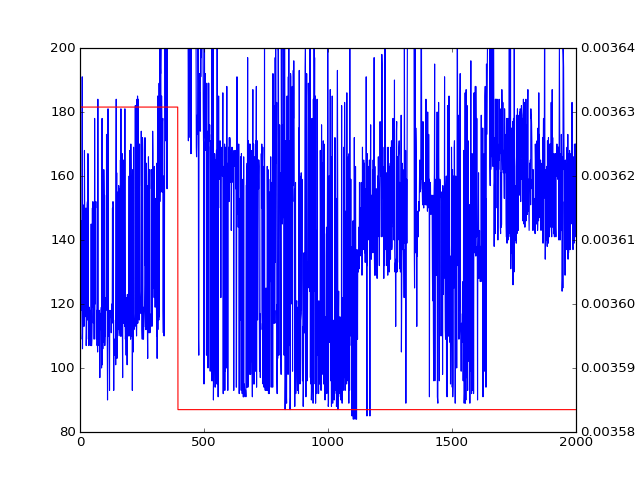

In [75]:
experience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, experience, n_episodes=2000, max_steps=200, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

In [59]:
steps_per_episode

array([143, 129, 132, 148, 149, 147, 142, 148, 136, 147, 151, 153, 147,
       148, 148, 134, 151, 152, 142, 100, 145, 134, 143, 149, 132, 147,
       147, 148, 131, 147, 149,  99, 150, 133, 145, 150, 145, 140,  98,
       148, 100,  95, 142, 145, 136, 144, 129, 109, 109, 143, 141, 146,
       145, 140, 146, 144, 143, 142, 147, 131, 146,  92, 147, 144, 140,
       145, 146, 130, 140, 131, 146, 146, 121, 144, 141, 129, 145, 150,
       109, 142, 159, 143, 144,  92,  92, 132, 148, 101,  93, 141, 102,
       146, 146,  97, 128, 109, 143, 143, 124, 109, 142, 144, 142, 152,
       142, 125, 106, 137, 147, 124, 124, 143, 149, 116, 122, 110, 144,
       149, 148, 141, 147, 127, 151, 102, 130,  93, 111, 119, 147,  99,
       129, 141,  97, 113, 150, 110, 140, 150, 140, 153,  99, 130, 148,
       147, 144, 134, 127, 140, 124, 146, 148, 197, 150, 137, 117, 132,
        93, 130,  98, 147, 148, 148, 113, 130, 112, 167, 110, 147,  93,
       117, 148, 132,  94, 145, 146, 138, 146, 123, 146, 149, 11

(40, 40) (40, 40) (40, 40)


<IPython.core.display.Javascript object>


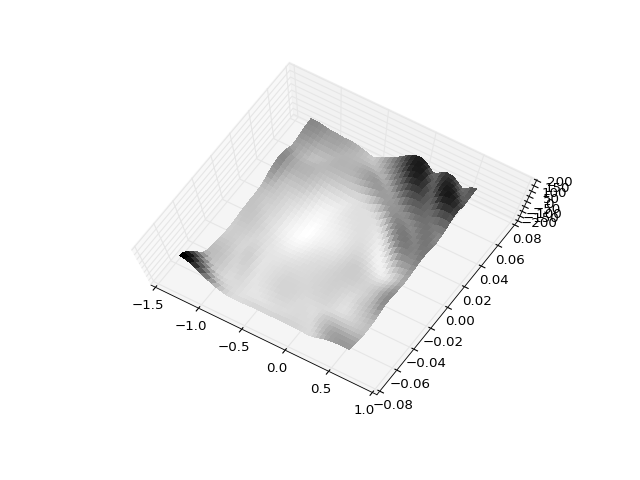

In [66]:
%matplotlib notebook
state_ranges = np.array([env.observation_space.low, env.observation_space.high])
driver.plot_2D_V(state_ranges, env.action_space, four_feature_vec, experience.theta)

In [69]:
experience, steps_per_episode = driver.train(env, linfa, experience, n_episodes=10, max_steps=200, is_render=True)
#pyplot.plot(steps_per_episode)
#pyplot.show()

In [100]:
from hiora_cartpole import features

env = gym.make('MountainCar-v0')

state_ranges = np.array([env.observation_space.low, env.observation_space.high])

tilec_n_weights, tilec_feature_vec = features.make_feature_vec(state_ranges, 3, [9, 9], 5)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
fexperience = linfa.init(lmbda=0.9,
                        init_alpha=1.0,
                        epsi=0.01,
                        feature_vec=tilec_feature_vec,
                        n_weights=tilec_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True)

[2016-09-17 17:35:43,138] Making new env: MountainCar-v0


<IPython.core.display.Javascript object>


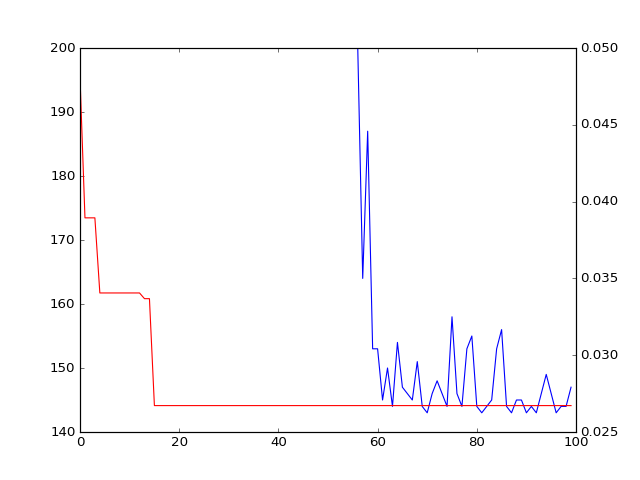

In [101]:
fexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, fexperience, n_episodes=100, max_steps=200, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

(40, 40) (40, 40) (40, 40)


<IPython.core.display.Javascript object>


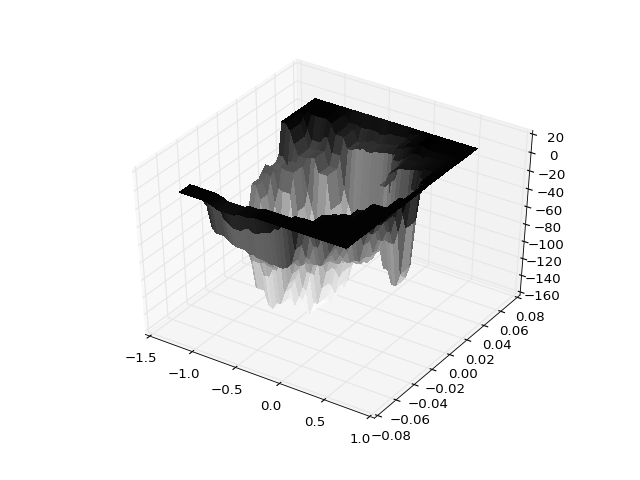

In [103]:
%matplotlib notebook
driver.plot_2D_V(state_ranges, env.action_space, tilec_feature_vec, fexperience.theta)

In [98]:
%debug

> /home/erle/.local/lib/python2.7/site-packages/scipy/sparse/base.py(91)set_shape()
     89             raise ValueError('invalid shape')
     90 
---> 91         if (self._shape != shape) and (self._shape is not None):
     92             try:
     93                 self = self.reshape(shape)

ipdb> q


In [5]:
# What do I want?
#
#  - Write one procedure that just trains for a number of episodes.
#
#  - Write another procedure that keeps a running average of episode lengths and
#    stops training when the average doesn't change much anymore.
#
#  - Possibly write a procedure that returns the sequence of Q functions
#    resulting from training.

next_dtimestep = driver.make_next_dtimestep(env, linfa.think)
train_and_prep = driver.make_train_and_prep(env, next_dtimestep, linfa.wrapup)

episode_nr, last_avg, experience \
    = driver.train_until_converged(
          env=env,
          train_and_prep=train_and_prep,
          init_experience=experience,
          max_steps=100,
          max_episodes=10000,
          avg_window=200,
          max_diff=1)
print episode_nr, last_avg




cnts_dtimesteps = driver.cnts_dtimesteps_iter(env, train_and_prep, experience,
                                              100)

thetas = driver.train_return_thetas(cnts_dtimesteps, 1000)

sqes = 1.0 / experience.theta.shape[0] * np.sum(np.diff(thetas, axis=0) ** 2, axis=1)

pyplot.plot(sqes)
pyplot.show()

sums = np.sum(np.abs(thetas), axis=1)
pyplot.plot(sums)
pyplot.show()

with np.load("hard-earned-theta.npz") as data:
    old_theta = data['arr_0']
    print np.sum(old_theta)

#hard_earned_theta = np.copy(experience.theta)
#np.savez_compressed("hard-earned-theta", hard_earned_theta)

0 100.0


KeyboardInterrupt: 

In [4]:
env.close()